C:\Users\user\anaconda3\envs\data_env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


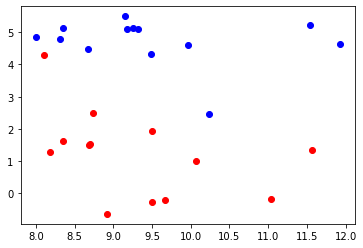

[[ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 9.49123469  4.33224792]
 [ 7.99815287  4.8525051 ]]


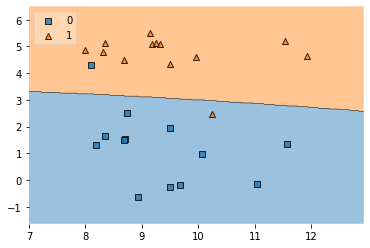

In [22]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import mglearn

# Data Loading
x_data, t_data = mglearn.datasets.make_forge()

# 데이터 분포도 확인
x_data_red = x_data[t_data==0]
x_data_blue = x_data[t_data==1]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.show()

# model 생성
model = SVC()
model.fit(x_data, t_data)

# SVM은 support vector를 구하고 이를 이용해 Decision Boundaries를 구함
print(model.support_vectors_)

plot_decision_regions(X=x_data, y=t_data, clf=model, legend=2)
plt.show()